

# Project: Movies Dataset
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains informationabout 10,000 movies collected fromThe Movie Database (TMDb),including user ratings and revenue.

###### Question 1  (Which genres are most popular from year to year?)
###### Question 2 (What properties are associated with highly rated movies?)
###### Question 3 (Which genres have the largest revenue and largest budgets?)



<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [4]:
# Import necessary libraries for data analysis and visualisations 
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#read the dataset from csv file
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

###### there are 10866 entries 21 columns

### number of samples 

In [8]:
df.shape[0] 

10866

### number of columns 

In [9]:
df.shape[1] 

21

### is there any duplicated rows?

In [10]:
sum(df.duplicated())

1

### what is the types of columns?

In [11]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### is there any null values in that dataset?

In [12]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

###### some of columns have a few missing values and some have a lot of missing values 

In [13]:
df.nunique() #number of unique values for each column

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

#### statistical 

In [14]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09




### Data Cleaning 

###### Drop the Duplicated rows

In [15]:
df.drop_duplicates(inplace = True)

###### There is only one duplicated row, so i will drop this row


### drop the columns that have more missing values in it

In [16]:
df.drop(columns = ['homepage','tagline','keywords'] , inplace = True)

#### These columns are not important for analysis

In [17]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [18]:
df.drop(columns = ['production_companies'] , inplace = True)

In [19]:
df.dropna(subset=['imdb_id'],inplace = True)

In [20]:
df.dropna(subset=['overview'],inplace = True)

#### drop null values for the important columns that i need it for analysis

In [21]:
df.dropna(subset=['cast','director','genres'],inplace = True)

In [22]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'overview', 'runtime', 'genres', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

###### check out about outliers of dataset

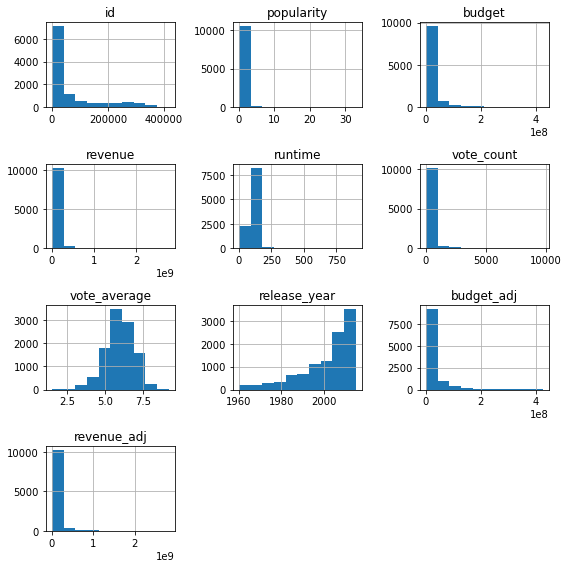

In [23]:
df.hist(figsize=(8,8));
plt.tight_layout()

###### i noticed that some important columns have a lot of zero so i will change it to NULL values instead of drop it

In [24]:
df[df['budget'] == 0]['budget'].count()

5572

In [25]:
df[df['revenue'] == 0]['revenue'].count()

5881

In [26]:
df[df['budget_adj'] == 0]['budget_adj'].count()

5572

In [27]:
df[df['revenue_adj'] == 0]['revenue_adj'].count()

5881

In [28]:
df['revenue_adj'] = df['revenue_adj'].replace(0,np.nan)
df['revenue'] = df['revenue'].replace(0,np.nan)
df['budget_adj'] = df['budget_adj'].replace(0,np.nan)
df['budget'] = df['budget'].replace(0,np.nan)


###### check the columns

In [29]:
df[df['revenue_adj'] == 0]['revenue_adj'].count()

0

In [30]:
df['runtime'] = df['runtime'].replace(0,np.nan)

In [31]:
df[df['runtime'] == 0]['runtime'].count() #count of zeros values for runtime column

0

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which genres are most popular from year to year?!)

###### convert the fields with two values into two rows and apply the function on that fields

In [32]:
hb_08=df[df['genres'].str.contains('|')]

In [33]:
df1 = hb_08.copy() # create new dataframe form copying so the original doesn't effect with any changes

In [35]:
df1['genres'] = df1['genres'].apply(lambda x:x.split("|")[0])

In [36]:
df1.shape

(10724, 17)

In [37]:
df1.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124.0,Action,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [38]:
df1['genres'].value_counts().sort_values(ascending = False).head(5)

Drama        2443
Comedy       2312
Action       1584
Horror        914
Adventure     584
Name: genres, dtype: int64

###### (Insight) so the most common Genres is Drama

###### let's explore the result by visualization  

[Text(0.5, 0, 'Genre'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'the value counts for each genre')]

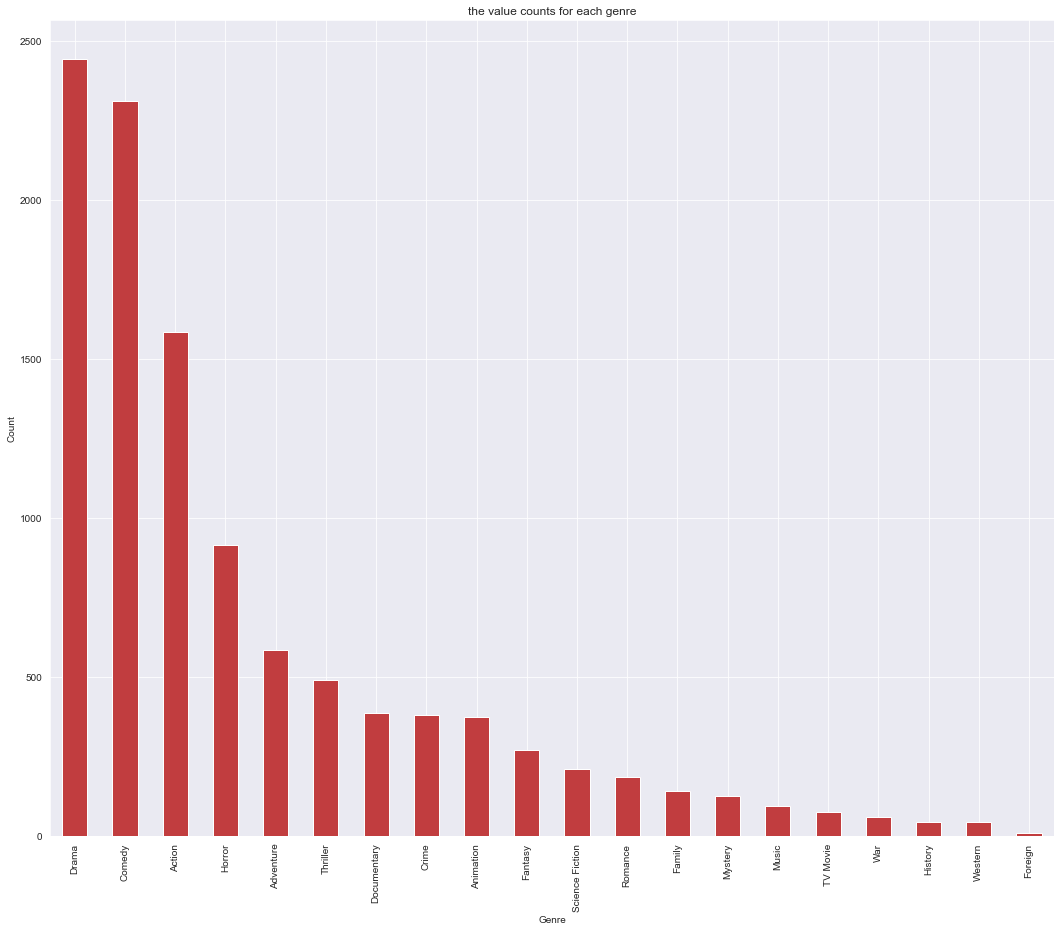

In [40]:

sns.set_style('darkgrid')

# plot data
fig, ax = plt.subplots(figsize=(18,15))

sns.set_palette("Set1", 20, .65)

# use unstack()
df1['genres'].value_counts().sort_values(ascending = False).plot(kind = 'bar' );
ax.set(xlabel='Genre', ylabel='Count', title = 'the value counts for each genre')


### Research Question 2  (What properties are associated with highly rated movies?)

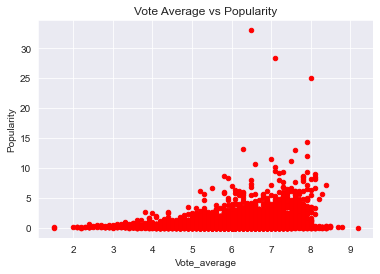

In [44]:
df1.plot(x = 'vote_average' , y = 'popularity',kind='scatter' , color ="red");
plt.xlabel('Vote_average')
plt.ylabel('Popularity')
plt.title('Vote Average vs Popularity');

###### The scatter plot above illustrates that both columns are positively correlated

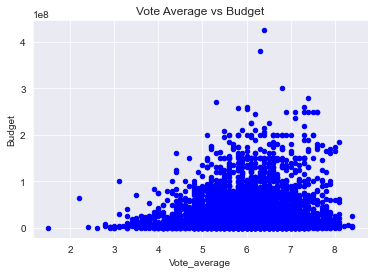

In [43]:
df1.plot(x = 'vote_average' , y = 'budget' , kind = 'scatter' , color='blue');
plt.xlabel('Vote_average')
plt.ylabel('Budget')
plt.title('Vote Average vs Budget');

###### (insight) The scatter plot above illustrates that both columns are positively correlated which means that movies with higher budgets tend be more highly voted by viewers

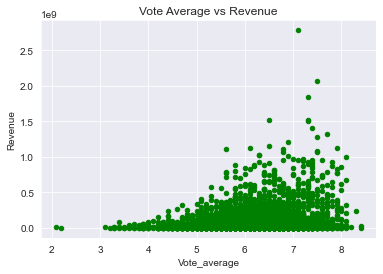

In [46]:
df1.plot( x = 'vote_average' , y = 'revenue' , kind ='scatter' , color = 'green');
plt.xlabel('Vote_average')
plt.ylabel('Revenue')
plt.title('Vote Average vs Revenue');

###### (insight) The scatter plot above illustrates that both columns are positively correlated which means that movies highly voted by viewers tend be more highly revenue 

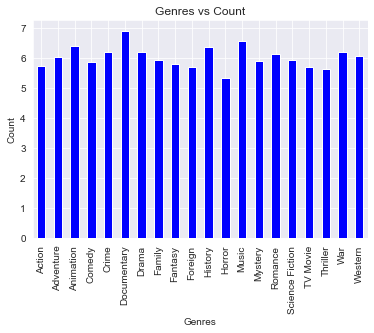

In [48]:
df_gen = df1.groupby('genres').mean() 
#displays the mean value of all columns aggregated by genre type
df_gen.sort_values('vote_average')
df_gen['vote_average'].plot(kind = 'bar' , color = 'blue');
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Genres vs Count');

### Research Question 3  (Which genres have the largest revenue and largest budgets?)

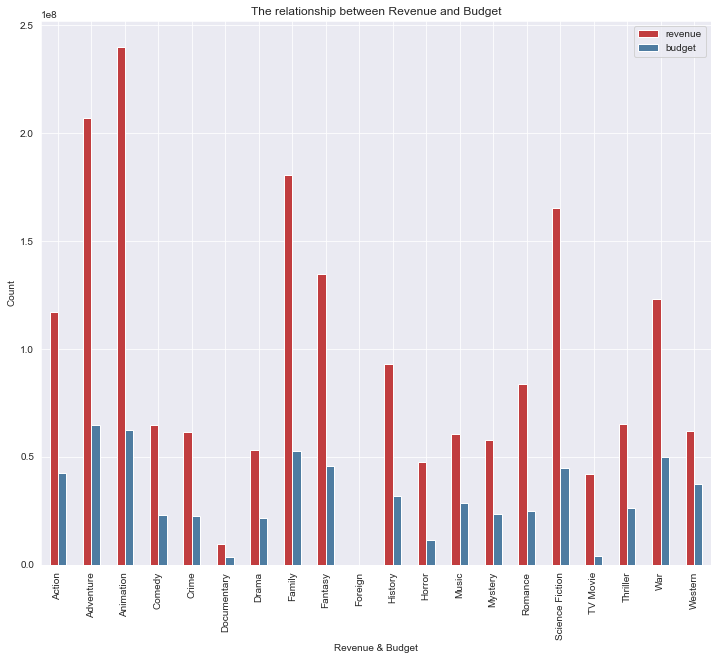

In [54]:
df1.groupby('genres').mean()[['revenue','budget']].plot(kind = 'bar' , figsize=(12,10));
plt.xlabel('Revenue & Budget')
plt.ylabel('Count')
plt.title('The relationship between Revenue and Budget');

## Conclusions


In this project, I was able to analyze and identify which properties are associated with movie popularity.
After cleaning by removing unnecessary, null, and duplicated values, I created a secondary table that broke each movie down into the separate genres it falls under.

Then I plotted a few charts to assess what will be used as the dependent variable, popularity or vote average
Next, I plotted various other variables against vote average and found that movies with higher vote averages tend to have higher budgets and higher revenue